## Exercise 1: Signal Plotting with Jupyter

This notebook demonstrates creating a signal, adding noise, and filtering it.

In [6]:
import numpy as np
import matplotlib.pyplot as plt


### Creating Fake Sensor Data

In [7]:
N_SAMPLES = 500

In [8]:
# The screenshot uses np.linspace(0, 2*np.pi, N_SAMPLES, dtype=float)
# This creates a range from 0 to 2*pi (approx 6.28)
input_range = np.linspace(0, 2 * np.pi, N_SAMPLES, dtype=float)

In [9]:
signal = np.sin(input_range)

In [10]:
# random noise with mu=0, sigma=1
noise = np.random.normal(0, 1, N_SAMPLES) 

In [11]:
assert noise.shape == input_range.shape

In [12]:
# The screenshot adds noise/5
noisy_signal = signal + noise / 5

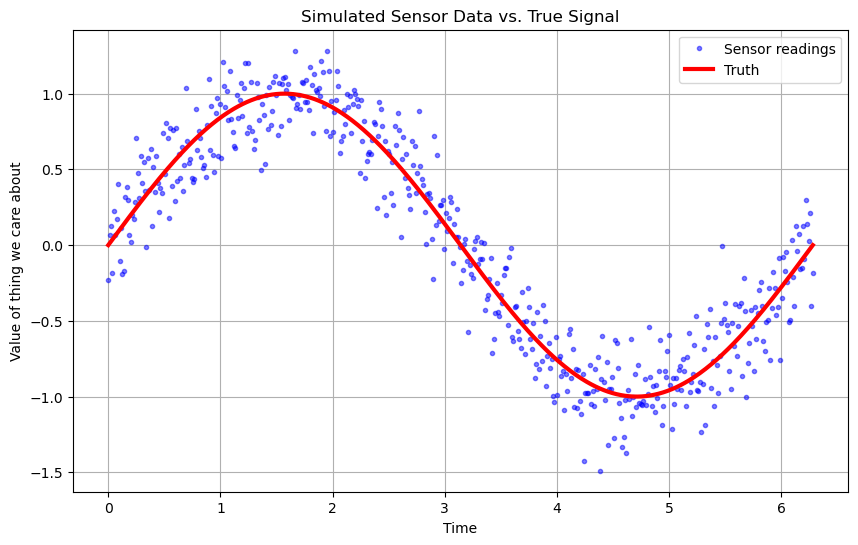

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5, label='Sensor readings') # Blue dots for noisy
plt.plot(input_range, signal, 'r-', linewidth=3, label='Truth') # Red line for true signal
plt.legend()
plt.xlabel('Time') 
plt.ylabel('Value of thing we care about')
plt.title('Simulated Sensor Data vs. True Signal')
plt.grid(True)
plt.show()

### Filtering Noise

With a noisy signal, we don't know the truth; we hope to reconstruct it.

In [14]:
# lowess returns a 2D array: 
# - column 0: sorted x-values (input_range)
# - column 1: smoothed y-values (filtered signal)

del signal
from statsmodels.nonparametric.smoothers_lowess import lowess # For the LOWESS filter
filtered_signal_lowess = lowess(noisy_signal, input_range, frac=0.1)

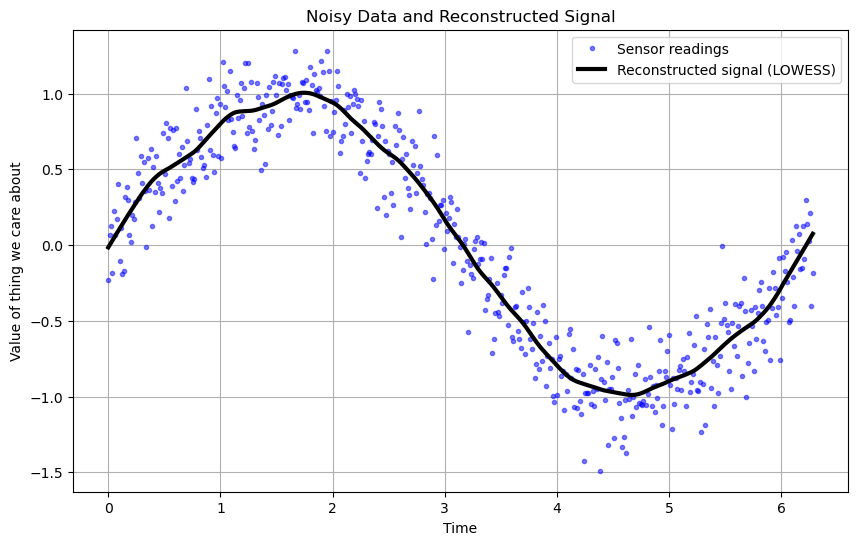

In [15]:
plt.figure(figsize=(10, 6))
plt.plot(input_range, noisy_signal, 'b.', alpha=0.5, label='Sensor readings')
plt.plot(filtered_signal_lowess[:, 0], filtered_signal_lowess[:, 1], 'k-', linewidth=3, label='Reconstructed signal (LOWESS)') # Black line for filtered
plt.legend()
plt.xlabel('Time') 
plt.ylabel('Value of thing we care about')
plt.title('Noisy Data and Reconstructed Signal')
plt.grid(True)
plt.show()